# Fast Fourier Transform (FFT)
## Recursive Implementation

The recursive implementation of the FFT consist of the following steps: 

1. Generate vectors $Y$ and $Z$: 
\begin{gather}
Y_n = X_{2n}, \quad Z_n = X_{2n+1}, \quad n = 0, \dotsb \frac{N}{2}-1
\end{gather}

2. Compute the 2 FFTs for the half size. (Recursive call)

3. Combine both $Y_n$ and $Z_n$ with the butterfly scheme:
\begin{gather}
x_k = y_k + \omega_N^k z_k\\
x_{k+\frac{N}{2}} = y_k - \omega^k_N z_k
\end{gather}


In [55]:
import numpy as np
import cmath

def rekursion(X,inverse):
    # X requires to be a power of 2
    N = np.size(X)

    # decide if inverse or not
    b = 1 if inverse == 1 else -1

    if (N>1):
        # Initialise variables
        Y = np.empty((np.int16(N/2),),np.complex_)
        Z = np.empty((np.int16(N/2),),np.complex_)

        # Generate Vectors Y and Z
        for i in range(0,np.int16(N/2)):
            Y[i] = X[2*i]
            Z[i] = X[2*i+1]

        # recursive call
        y = rekursion(Y,inverse)
        z = rekursion(Z,inverse)

        # compute butterfly
        x = np.empty((N,),np.complex_)
        for k in range(0,np.int16(N/2)):
            wz = cmath.exp(b*1J*2*cmath.pi*k/N)*z[k]
            x[k] = y[k]+wz
            x[k+np.int16(N/2)] = y[k]-wz

    else:
        # termination case N == 1
        x=X

    return x

def rekfft(X):
    return rekursion(X,0)

def rekifft(X):
    N = np.size(X)
    return 1/N*rekursion(X,1)

print('System computete FFT: \n',np.fft.fft([1,2,3,4,5,6,7,8]))
print('Self implemented FFT:\n',rekfft([1,2,3,4,5,6,7,8]),'\n')

print('System computed iFFT:\n',np.fft.ifft([1,2,3,4,5,6,7,8]))
print('Self implemented iFFT:\n',rekifft([1,2,3,4,5,6,7,8]))


System computete FFT: 
 [36.+0.j         -4.+9.65685425j -4.+4.j         -4.+1.65685425j
 -4.+0.j         -4.-1.65685425j -4.-4.j         -4.-9.65685425j]
Self implemented FFT:
 [36.+0.j         -4.+9.65685425j -4.+4.j         -4.+1.65685425j
 -4.+0.j         -4.-1.65685425j -4.-4.j         -4.-9.65685425j] 

System computed iFFT:
 [ 4.5+0.j         -0.5-1.20710678j -0.5-0.5j        -0.5-0.20710678j
 -0.5+0.j         -0.5+0.20710678j -0.5+0.5j        -0.5+1.20710678j]
Self implemented iFFT:
 [ 4.5+0.j         -0.5-1.20710678j -0.5-0.5j        -0.5-0.20710678j
 -0.5+0.j         -0.5+0.20710678j -0.5+0.5j        -0.5+1.20710678j]


## Iterative Implementation
In the iterative implementation the FFT is devided into a sorting phase and a computational phase. 

### Sorting algorithm:
The sorting algorithm can be implemented by bit reversal. For a vector of length $N=2^p$ we obtain a runtime: 

1. Each bit reversal has runtime $\mathcal{O}(p)$

2. Bit reversal is run for $N$

Given a complete runtime of $\mathcal{O}(N \log N)$

In [56]:
def fftshift(X):
    # X requires to be a power of 2
    N =  np.size(X)
    p = np.int16(np.log2(N)) # size(N) = 2^p

    for n in range(0,N):
        j = 0; m = n
        for i in range(0,p):
            j = np.int16(2*j + m%2); m = np.int16(m/2)
        if (j>n):
            h = X[j]; X[j] = X[n]; X[n] = h
    
    return X

print('Indices: ',[0,1,2,3,4,5,6,7])
print('Shifted Indices: ',fftshift([0,1,2,3,4,5,6,7]))

Indices:  [0, 1, 2, 3, 4, 5, 6, 7]
Shifted Indices:  [0, 4, 2, 6, 1, 5, 3, 7]


### Iterative Butterfly implemetation
There exist different variants, which will be implemented seperately below: 

#### 1. Variant:

In [57]:
def butterfly_v1(X,inverse):
    # X requires to be a power of 2 and sorted by fftshift
    X = np.array(X,np.complex_)
    N =  np.size(X)
    p = np.int16(np.log2(N)) # size(N) = 2^p

    # decide if inverse or not
    b = 1 if inverse == 1 else -1

    for  L in 2**np.array(range(1,p+1)):
        for k in np.arange(0,N,L):
            for j in range(0,np.int_(L/2)):
                wz = cmath.exp(b*1J*2*cmath.pi*j/L)*X[k+j+np.int_(L/2)]
                X[k+j+np.int_(L/2)] = X[k+j] - wz
                X[k+j] = X[k+j] + wz
    return X

def itfft_v1(X):
    return butterfly_v1(fftshift(X),0)

def itifft_v1(X):
    return 1/np.size(X)*butterfly_v1(fftshift(X),1)

print('System computete FFT: \n',np.fft.fft([1,2,3,4,5,6,7,8]))
print('Self implemented FFT:\n',itfft_v1([1,2,3,4,5,6,7,8]),'\n')

print('System computed iFFT:\n',np.fft.ifft([1,2,3,4,5,6,7,8]))
print('Self implemented iFFT:\n',itifft_v1([1,2,3,4,5,6,7,8]))
    

System computete FFT: 
 [36.+0.j         -4.+9.65685425j -4.+4.j         -4.+1.65685425j
 -4.+0.j         -4.-1.65685425j -4.-4.j         -4.-9.65685425j]
Self implemented FFT:
 [36.+0.j         -4.+9.65685425j -4.+4.j         -4.+1.65685425j
 -4.+0.j         -4.-1.65685425j -4.-4.j         -4.-9.65685425j] 

System computed iFFT:
 [ 4.5+0.j         -0.5-1.20710678j -0.5-0.5j        -0.5-0.20710678j
 -0.5+0.j         -0.5+0.20710678j -0.5+0.5j        -0.5+1.20710678j]
Self implemented iFFT:
 [ 4.5+0.j         -0.5-1.20710678j -0.5-0.5j        -0.5-0.20710678j
 -0.5+0.j         -0.5+0.20710678j -0.5+0.5j        -0.5+1.20710678j]


Variant 1 can also be implemented vectorised with the help of SIMD. Therefore it is possible to speed up computation time 

Itterative FFT:
Elapsed time = 0.3464686870574951
Vectorised FFT:
Elapsed time = 0.26685214042663574


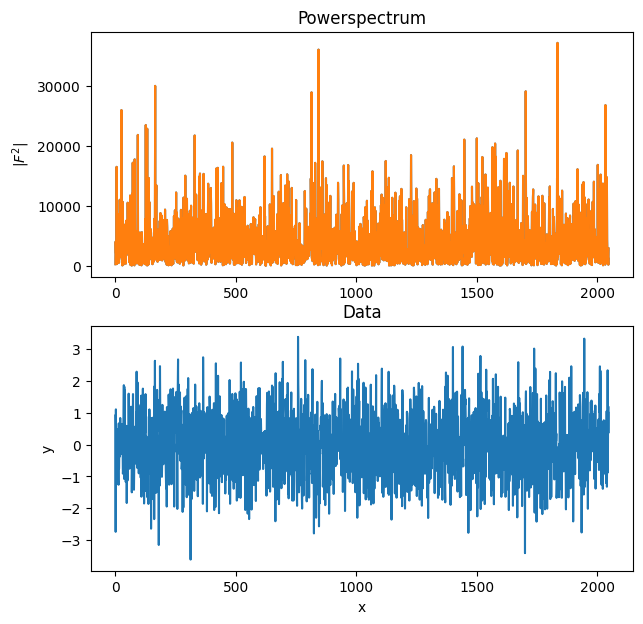

In [58]:
from matplotlib import pyplot as plt
import time

def butterfly_v1_vec(X,inverse):
    # X requires to be a power of 2 and sorted by fftshift
    X = np.array(X,np.complex_)
    N =  np.size(X)
    p = np.int16(np.log2(N)) # size(N) = 2^p

    # decide if inverse or not
    b = 1 if inverse == 1 else -1

    SIMD_LENGTH = 16

    for  L in 2**np.array(range(1,p+1)):
        d = np.min([SIMD_LENGTH,np.int_(L/2)])
        for k in np.arange(0,N,L):
            for j in np.arange(0,np.int_(L/2),SIMD_LENGTH):
                kjStart = k+j
                kjEnde = k+j+d
                wz = np.multiply(np.exp(b*1J*2*np.pi*np.arange(kjStart-k,kjEnde-k)/L),X[kjStart+np.int_(L/2):kjEnde+np.int_(L/2)])
                X[kjStart+np.int_(L/2):kjEnde+np.int_(L/2)] = np.subtract(X[kjStart:kjEnde],wz)
                X[kjStart:kjEnde] = np.add(X[kjStart:kjEnde],wz)
    return X

def itfft_v1_vec(X):
    return butterfly_v1_vec(fftshift(X),0)

def itifft_v1_vec(X):
    return 1/np.size(X)*butterfly_v1_vec(fftshift(X),1)

plt.figure(figsize=(7,7))
size = 2**11
Y = np.random.randn(size)+np.random.randn(size)*1J
X = Y

print('Itterative FFT:')
t = time.time()
fhat = itfft_v1(X)
elapsed = time.time()-t
print('Elapsed time =',elapsed)
plt.subplot(2,1,1)
plt.title('Powerspectrum')
plt.ylabel('$|F^2|$')
plt.plot(np.abs(fhat**2))

X = fftshift(Y) # FFT shift is needed due to modification of X in fftshift

print('Vectorised FFT:')
t = time.time()
fhat = itfft_v1_vec(X)
elapsed = time.time()-t
print('Elapsed time =',elapsed)
plt.plot(np.abs(fhat**2))

plt.subplot(2,1,2)
plt.plot(np.real(fftshift(X)))
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data')
plt.show()


#### 2. Variant :

In the second variant the $k$ an d$j$ loops can be permuted, such that $\omega_L^j$ is computed in the outer loop and therefore reduces computation complexity. 

In [59]:
def butterfly_v2(X,inverse):
    # X requires to be a power of 2 and sorted by fftshift
    X = np.array(X,np.complex_)
    N =  np.size(X)
    p = np.int16(np.log2(N)) # size(N) = 2^p

    # decide if inverse or not
    b = 1 if inverse == 1 else -1

    for  L in 2**np.array(range(1,p+1)):
        wz = cmath.exp(b*1J*2*cmath.pi*j/L)*X[k+j+np.int_(L/2)]
        for j in range(0,np.int_(L/2)):
            for k in np.arange(0,N,L):
                X[k+j+np.int_(L/2)] = X[k+j] - wz
                X[k+j] = X[k+j] + wz
    return X

def itfft_v2(X):
    return butterfly_v2(fftshift(X),0)

def itifft_v2(X):
    return 1/np.size(X)*butterfly_v2(fftshift(X),1)

print('System computete FFT: \n',np.fft.fft([1,2,3,4,5,6,7,8]))
print('Self implemented FFT:\n',itfft_v1([1,2,3,4,5,6,7,8]),'\n')

print('System computed iFFT:\n',np.fft.ifft([1,2,3,4,5,6,7,8]))
print('Self implemented iFFT:\n',itifft_v1([1,2,3,4,5,6,7,8]))

System computete FFT: 
 [36.+0.j         -4.+9.65685425j -4.+4.j         -4.+1.65685425j
 -4.+0.j         -4.-1.65685425j -4.-4.j         -4.-9.65685425j]
Self implemented FFT:
 [36.+0.j         -4.+9.65685425j -4.+4.j         -4.+1.65685425j
 -4.+0.j         -4.-1.65685425j -4.-4.j         -4.-9.65685425j] 

System computed iFFT:
 [ 4.5+0.j         -0.5-1.20710678j -0.5-0.5j        -0.5-0.20710678j
 -0.5+0.j         -0.5+0.20710678j -0.5+0.5j        -0.5+1.20710678j]
Self implemented iFFT:
 [ 4.5+0.j         -0.5-1.20710678j -0.5-0.5j        -0.5-0.20710678j
 -0.5+0.j         -0.5+0.20710678j -0.5+0.5j        -0.5+1.20710678j]


#### Loop Blocking
By loop blocking the advantage of recursion, not loading entire $X$ into the cache in each $L$ loop, can be used to ehance performance. 

In [60]:
def butterfly_v1_loop(X,inverse):
    # X requires to be a power of 2 and sorted by fftshift
    X = np.array(X,np.complex_)
    N =  np.size(X)
    p = np.int16(np.log2(N)) # size(N) = 2^p

    # decide if inverse or not
    b = 1 if inverse == 1 else -1

    M = 4

    for  L in 2**np.array(range(1,p+1)):
        M = np.max([M,L])
        for kb in np.arange(0,N,M):
            for k in np.arange(kb,kb+M,L):
                for j in range(0,np.int_(L/2)):
                    wz = cmath.exp(b*1J*2*cmath.pi*j/L)*X[k+j+np.int_(L/2)]
                    X[k+j+np.int_(L/2)] = X[k+j] - wz
                    X[k+j] = X[k+j] + wz
    return X

def itfft_v1_loop(X):
    return butterfly_v1_loop(fftshift(X),0)

def itifft_v1_loop(X):
    return 1/np.size(X)*butterfly_v1_loop(fftshift(X),1)

print('System computete FFT: \n',np.fft.fft([1,2,3,4,5,6,7,8]))
print('Self implemented FFT:\n',itfft_v1_loop([1,2,3,4,5,6,7,8]),'\n')

print('System computed iFFT:\n',np.fft.ifft([1,2,3,4,5,6,7,8]))
print('Self implemented iFFT:\n',itifft_v1_loop([1,2,3,4,5,6,7,8]))

System computete FFT: 
 [36.+0.j         -4.+9.65685425j -4.+4.j         -4.+1.65685425j
 -4.+0.j         -4.-1.65685425j -4.-4.j         -4.-9.65685425j]
Self implemented FFT:
 [36.+0.j         -4.+9.65685425j -4.+4.j         -4.+1.65685425j
 -4.+0.j         -4.-1.65685425j -4.-4.j         -4.-9.65685425j] 

System computed iFFT:
 [ 4.5+0.j         -0.5-1.20710678j -0.5-0.5j        -0.5-0.20710678j
 -0.5+0.j         -0.5+0.20710678j -0.5+0.5j        -0.5+1.20710678j]
Self implemented iFFT:
 [ 4.5+0.j         -0.5-1.20710678j -0.5-0.5j        -0.5-0.20710678j
 -0.5+0.j         -0.5+0.20710678j -0.5+0.5j        -0.5+1.20710678j]


In the loop blocking scheme we can exchage the $kb$ and $L$ loop. It is more efficient to perform the loop exchange for $L<=M$ and no loop break in case of $L>M$. 